<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 167.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 208.3 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [20]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())
df.info()

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [21]:
Dups = df[df.duplicated(keep = False)]
Dups.count()

ResponseId             40
MainBranch             40
Age                    40
Employment             40
RemoteWork             28
                       ..
JobSatPoints_11        12
SurveyLength           32
SurveyEase             34
ConvertedCompYearly     4
JobSat                 10
Length: 114, dtype: int64

##### Task 2: Remove the duplicate rows from the dataframe.



In [22]:
df = df.drop_duplicates(keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 57.4+ MB


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [23]:
df.isnull()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
65433,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
65434,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
65435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [24]:
df['RemoteWork'].isnull().sum()

np.int64(10631)

### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [25]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [26]:
most_freq_RemoteWork = df['RemoteWork'].value_counts().idxmax()
most_freq_RemoteWork

'Hybrid (some remote, some in-person)'

##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [27]:
df['RemoteWork'] = df['RemoteWork'].fillna(most_freq_RemoteWork)

df['RemoteWork'].isnull().sum()

np.int64(0)

##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


/tmp/ipykernel_300/1390309866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['log_Comp'] = np.log1p(df_cleaned['ConvertedCompYearly'])
/tmp/ipykernel_300/1390309866.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['log_Comp_MinMax'] = (df_cleaned['log_Comp'] - min_value) / (max_value - min_value)
/tmp/ipykernel_300/1390309866.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

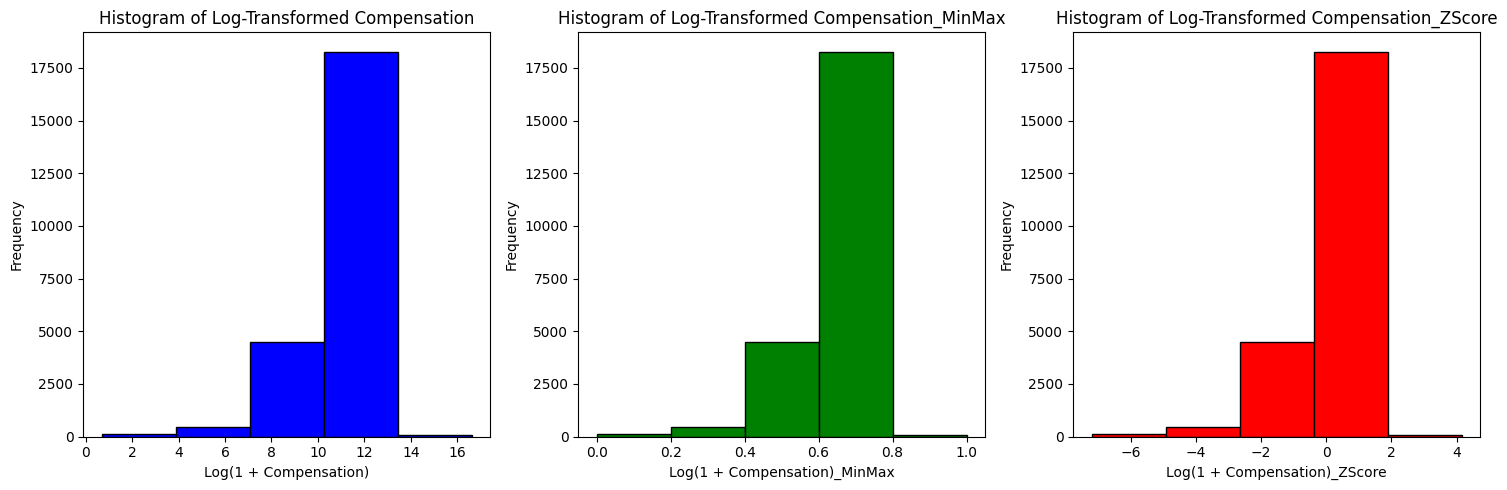

In [34]:
compensation_keywords = ['Comp', 'Salary', 'Income']

compensation_columns = [ col for col in df.columns if any(keyword in col for keyword in compensation_keywords)]

print('Compensation related columns:', compensation_columns)

import numpy as np

df_cleaned = df.dropna(subset = ['ConvertedCompYearly'])

df_cleaned['log_Comp'] = np.log1p(df_cleaned['ConvertedCompYearly'])

min_value = df_cleaned['log_Comp'].min()
max_value = df_cleaned['log_Comp'].max()

df_cleaned['log_Comp_MinMax'] = (df_cleaned['log_Comp'] - min_value) / (max_value - min_value)

mean_value = df_cleaned['log_Comp'].mean()
std_dev = df_cleaned['log_Comp'].std()

df_cleaned['log_Comp_ZScore'] = (df_cleaned['log_Comp'] - mean_value) / std_dev

!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
plt.hist(df_cleaned['log_Comp'], bins = 5, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Log-Transformed Compensation')
plt.xlabel('Log(1 + Compensation)')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(df_cleaned['log_Comp_MinMax'], bins = 5, color = 'green', edgecolor = 'black')
plt.title('Histogram of Log-Transformed Compensation_MinMax')
plt.xlabel('Log(1 + Compensation)_MinMax')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(df_cleaned['log_Comp_ZScore'], bins = 5, color = 'red', edgecolor = 'black')
plt.title('Histogram of Log-Transformed Compensation_ZScore')
plt.xlabel('Log(1 + Compensation)_ZScore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
